# Ch.4 분류

#### Logistic Regression

In [39]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [91]:
from sklearn.datasets import load_iris
iris = load_iris()

In [92]:
# data, target, target_name, feature_names, DESCR
data = iris.data
label = iris.target
columns = iris.feature_names

df = pd.DataFrame(data, columns = columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.2,
                                                    shuffle = True, stratify
                                                    = label,
                                                    random_state = 2019)

- 모델 객체 생성

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(verbose = 1)

- 모델 학습

In [95]:
lr.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

- 예측(결과 확인)

In [96]:
y_pred_lr = lr.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)

0.9666666666666667

In [98]:
# 계수를 의미
lr.coef_

array([[-0.4331758 ,  0.82135237, -2.39403865, -0.96776796],
       [ 0.49039201, -0.29955397, -0.15924469, -0.91532022],
       [-0.05721621, -0.5217984 ,  2.55328334,  1.88308818]])

In [99]:
# y 절편을 의미
lr.intercept_

array([  9.79503679,   2.02943481, -11.8244716 ])

In [100]:
from sklearn.svm import SVC

In [101]:
svc = SVC()

In [102]:
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
sv_pred_svc = svc.predict(x_test)

In [104]:
accuracy_score(y_test, sv_pred_svc)

0.9666666666666667

### Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
dc = DecisionTreeClassifier()

In [107]:
dc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
dc_pred_dc = dc.predict(x_test)

In [109]:
accuracy_score(y_test, dc_pred_dc)

0.9666666666666667

#### 결과값 비교

In [110]:
df = pd.DataFrame({'LR': y_pred_lr, 'SVC': sv_pred_svc, 'Decitiontree': dc_pred_dc})
df

,LR,SVC,Decitiontree
0,1,1,1
1,1,1,1
2,2,2,2
3,2,2,2
4,2,2,2
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [111]:
from sklearn.tree import export_graphviz

In [112]:
export_graphviz(dc, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)

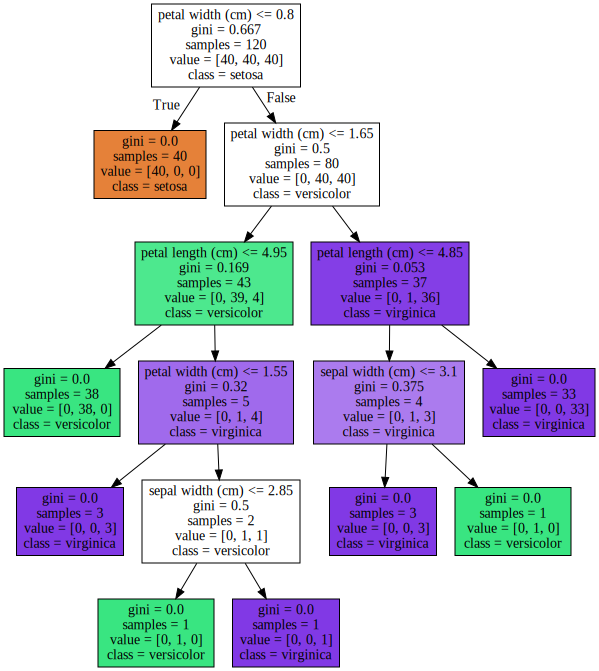

In [113]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 제약 조건
- max_depth = 3

In [116]:
dc2 = DecisionTreeClassifier(max_depth=3)
dc2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [117]:
export_graphviz(dc2, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)

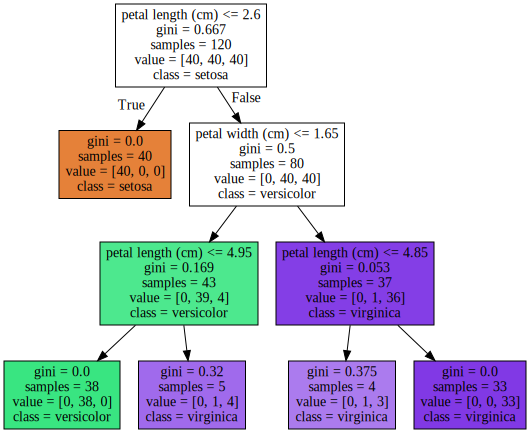

In [118]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [119]:
y_pred = dc2.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

- min_samples_split = 4 인 경우

In [120]:
dc3 = DecisionTreeClassifier(min_samples_split= 4)
dc3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

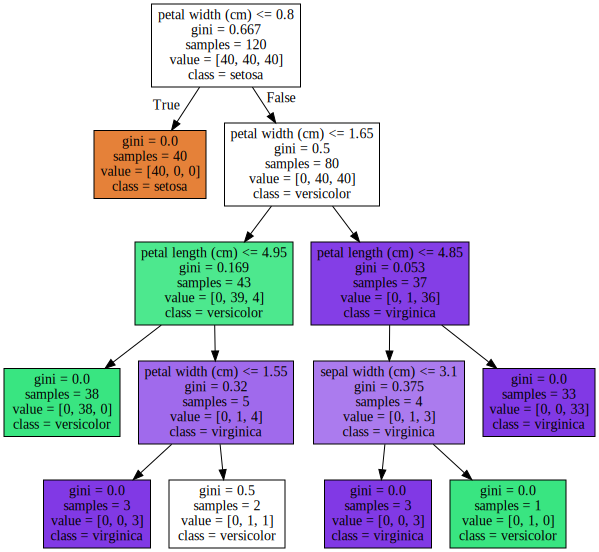

In [121]:
export_graphviz(dc3, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [122]:
y_pred = dc3.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

- min_samples_leaf = 4 인 경우

In [123]:
dc4 = DecisionTreeClassifier(min_samples_leaf= 4)
dc4.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

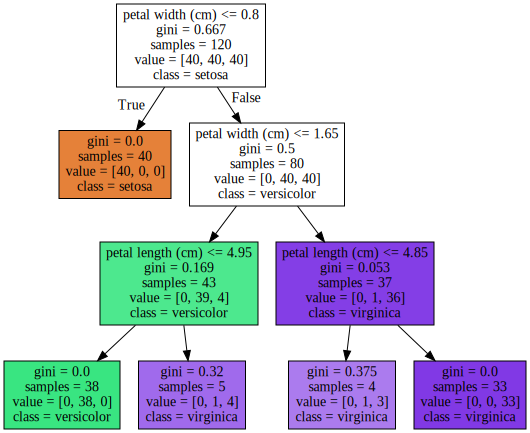

In [124]:
export_graphviz(dc4, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=True, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [125]:
y_pred = dc4.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

### Feature 중요도

In [126]:
dc4.feature_importances_

array([0.        , 0.        , 0.07934668, 0.92065332])

In [127]:
# feature별 importance 매핑
for name, value in zip(iris.feature_names, dc4.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

sepal length (cm): 0.000
sepal width (cm): 0.000
petal length (cm): 0.079
petal width (cm): 0.921


In [128]:
df = pd.DataFrame({'name': iris.feature_names, '제약 후': dc.feature_importances_,
                   'max_depth = 3': dc2.feature_importances_,
                   'min_samples_split = 4': dc3.feature_importances_,
                   'min_samples_leaf = 4': dc4.feature_importances_})
df

,name,제약 후,max_depth = 3,min_samples_split = 4,min_samples_leaf = 4
0,sepal length (cm),0.012500,0.000000,0.000000,0.000000
1,sepal width (cm),0.018750,0.000000,0.018987,0.000000
2,petal length (cm),0.576272,0.599503,0.077237,0.079347
3,petal width (cm),0.392478,0.400497,0.903775,0.920653


### 앙상블 학습

In [129]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

In [130]:
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [138]:
# 로지스틱 회귀와 KNN 모델을 활용
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 로지스틱 회귀와 KNN 두 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 (보팅)
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size = 0.2, random_state = 150)
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9649


In [139]:
classifiers = [vo_clf, lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

VotingClassifier 정확도 : 0.9649
LogisticRegression 정확도 : 0.9561
KNeighborsClassifier 정확도 : 0.9474


### Random Forest

In [146]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                  columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0] + '_' + str(x[1])
                                                                                              if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [150]:
def get_human_dataset():
    feature_name_df = pd.read_csv('human_activity/features.txt', sep = '\s+',
                                  header = None, names = ['column_index', 'column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt', sep = '\s+', names = feature_name)
    
    y_train = pd.read_csv('human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt', sep = '\s+', header = None, names = ['action'])
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = get_human_dataset()

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [167]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [181]:
X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=8,
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9196


In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

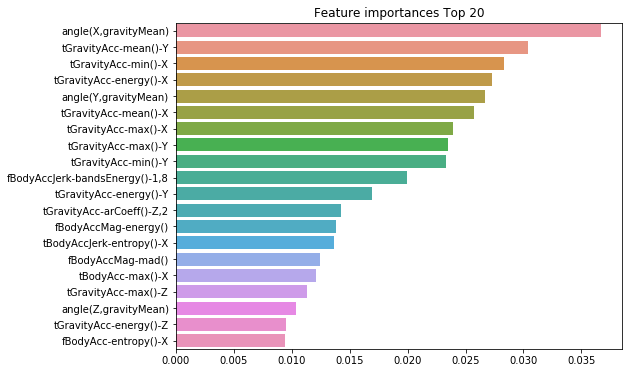

In [183]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = get_human_dataset()

gb_clf = GradientBoostingClassifier(random_state=0, verbose = 1)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

      Iter       Train Loss   Remaining Time 
         1       10340.3113            7.45m
         2        8582.2920            7.89m
         3        7283.1605            7.97m
         4        6276.5356            7.96m
         5        5457.5371            7.93m
         6        4785.1275            7.88m
         7        4227.2374            7.79m
         8        3736.9844            7.70m
         9        3350.6008            7.61m
        10        3000.1676            7.52m
        20        1220.7822            6.74m
        30         618.1201            5.89m
        40         378.4007            5.06m
        50         262.6745            4.23m
        60         190.7980            3.39m
        70         146.5356            2.53m
        80         116.6210            1.66m
        90          93.9275           48.96s
       100          77.9308            0.00s


In [168]:
print('정확도: {0:.4f}'.format(gb_accuracy))

정확도: 0.9382


#### 4.6 XGBoost(eXtra Gradient Boosting)

In [5]:
import xgboost as xgb
from xgboost import XGBClassifier

In [6]:
import xgboost

In [7]:
xgboost.__version__

'1.1.1'

In [8]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

In [9]:
cancer_df = pd.DataFrame(data = X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size = 0.2, random_state = 150)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [13]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [14]:
params = {'max_depth':3,
          'eta': 0.1,
          'objective': 'binary:logistic',
          'eval_metric': 'logloss',
          'early_stoppings': 100}
num_rounds = 400

In [15]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds=100, evals=wlist)

[15:25:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60845	eval-logloss:0.61256
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.53942	eval-logloss:0.54848
[2]	train-logloss:0.48286	eval-logloss:0.49271
[3]	train-logloss:0.43246	eval-logloss:0.44553
[4]	train-logloss:0.38986	eval-logloss:0.40399
[5]	train-logloss:0.35220	eval-logloss:0.36926
[6]	train-logloss:0.32023	eval-logloss:0.33855
[7]	train-logloss:0.29094	eval-logloss:0.31281
[8]	train-logloss:0.26628	eval-logloss:0.28674
[9]	train-logloss:0.24424	eval-log

[159]	train-logloss:0.00755	eval-logloss:0.07659
[160]	train-logloss:0.00751	eval-logloss:0.07625
[161]	train-logloss:0.00746	eval-logloss:0.07680
[162]	train-logloss:0.00744	eval-logloss:0.07705
[163]	train-logloss:0.00742	eval-logloss:0.07708
[164]	train-logloss:0.00739	eval-logloss:0.07675
[165]	train-logloss:0.00734	eval-logloss:0.07683
[166]	train-logloss:0.00730	eval-logloss:0.07734
[167]	train-logloss:0.00728	eval-logloss:0.07703
[168]	train-logloss:0.00726	eval-logloss:0.07708
[169]	train-logloss:0.00724	eval-logloss:0.07711
[170]	train-logloss:0.00722	eval-logloss:0.07729
[171]	train-logloss:0.00721	eval-logloss:0.07753
[172]	train-logloss:0.00717	eval-logloss:0.07795
[173]	train-logloss:0.00716	eval-logloss:0.07813
[174]	train-logloss:0.00714	eval-logloss:0.07783
[175]	train-logloss:0.00712	eval-logloss:0.07787
[176]	train-logloss:0.00711	eval-logloss:0.07810
[177]	train-logloss:0.00709	eval-logloss:0.07829
[178]	train-logloss:0.00707	eval-logloss:0.07834
[179]	train-logloss:

In [17]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10만 표시:', preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.999 0.579 1.    0.    0.    0.998 0.73  0.998 1.    0.001]
예측값 10만 표시: [1, 1, 1, 0, 0, 1, 1, 1, 1, 0]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [24]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [26]:
get_clf_eval(y_test, preds, pred_probs)

오차행렬
[[40  2]
 [ 0 72]]
정확도: 0.9825, 정밀도: 0.9730, 재현율: 1.0000, F1: 0.9863, AUC: 0.9940


In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

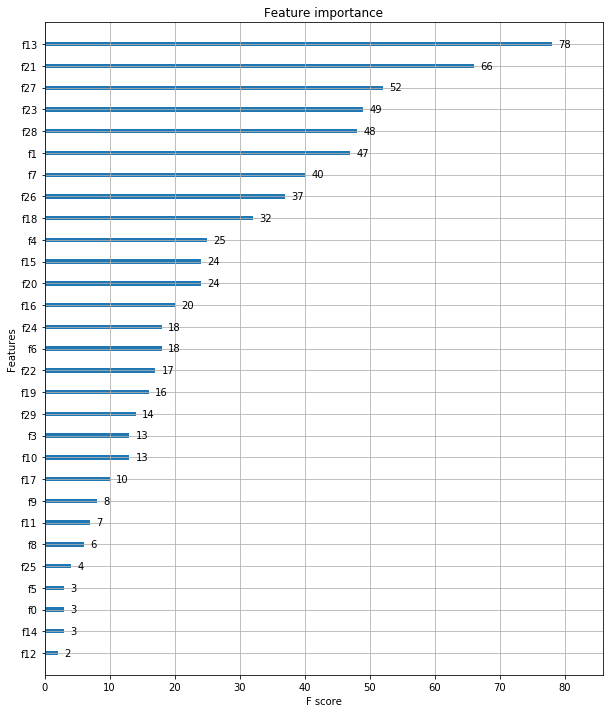

In [28]:
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax = ax)

In [29]:
from xgboost import XGBClassifier

In [30]:
xgb_wrapper = XGBClassifier(n_estimator = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[15:38:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [31]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차행렬
[[40  2]
 [ 0 72]]
정확도: 0.9825, 정밀도: 0.9730, 재현율: 1.0000, F1: 0.9863, AUC: 0.9940


In [32]:
from xgboost import XGBClassifier

In [35]:
xgb_wrapper = XGBClassifier(n_estimator = 400, learning_rate = 0.1, max_depth = 3)
evals = [(X_test, y_test)]

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss',
                eval_set = evals, verbose = True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[15:40:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.61256
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.54848
[2]	validation_0-logloss:0.49271
[3]	validation_0-logloss:0.44553
[4]	validation_0-logloss:0.40399
[5]	validation_0-logloss:0.36926
[6]	validation_0-logloss:0.33855
[7]	validation_0-logloss:0.31281
[8]	validation_0-logloss:0.28674
[9]	validation_0-logloss:0.26667
[10]	validation_0-logloss:0.24768
[11]	validation_0-logloss:0.22930
[12]	validation_0-logloss:0.21541
[13]	validation_0-logloss:0.20192
[14]	validation_0-logloss:0.18850
[15]	validation_0-logloss:0.17656
[16]	val

In [36]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차행렬
[[40  2]
 [ 0 72]]
정확도: 0.9825, 정밀도: 0.9730, 재현율: 1.0000, F1: 0.9863, AUC: 0.9940


In [37]:
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
                eval_metric='logloss', eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[15:42:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-logloss:0.61256
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.54848
[2]	validation_0-logloss:0.49271
[3]	validation_0-logloss:0.44553
[4]	validation_0-logloss:0.40399
[5]	validation_0-logloss:0.36926
[6]	validation_0-logloss:0.33855
[7]	validation_0-logloss:0.31281
[8]	validation_0-logloss:0.28674
[9]	validation_0-logloss:0.26667
[10]	validation_0-logloss:0.24768
[11]	validation_0-logloss:0.22930
[12]	validation_0-logloss:0.21541
[13]	validation_0-logloss:0.20192
[14]	validation_0-logloss:0.18850
[15]	validation_0-logloss:0.17656
[16]	vali

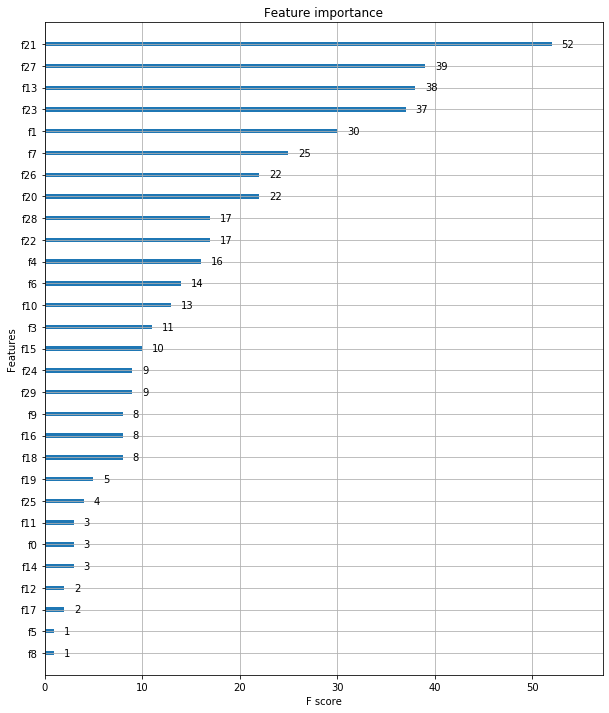

In [38]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax = ax)